## South Korean COVID_19 patients datasets

### This notebook makes use of the following data, associated with the COVID-19 pandemic in South Korea :

1)  **Case.csv** - *Data of COVID-19 infection cases in South Korea*  
2)  **PatientInfo.csv** - *Epidemiological data of COVID-19 patients in South Korea*  
3)  **Time.csv** - *Time series data of COVID-19 status in South Korea*  
4)  **TimeAge.csv** - *Time series data of COVID-19 status in terms of the age in South Korea*  
5)  **TimeGender.csv** - *Time series data of COVID-19 status in terms of gender in South Korea*  
6)  **TimeProvince.csv** - *Time series data of COVID-19 status in terms of the Province in South Korea*  
7)  **Region.csv** - *Location and statistical data of the regions in South Korea*  
8)  **Weather.csv** - *Data of the weather in the regions of South Korea*  
9)  **Policy.csv** - *Data of the government policy for COVID-19 in South Korea*  

***Map of South Korea, with its regions painted in different colors and with supplementary information alnogside.***  
Source: Google

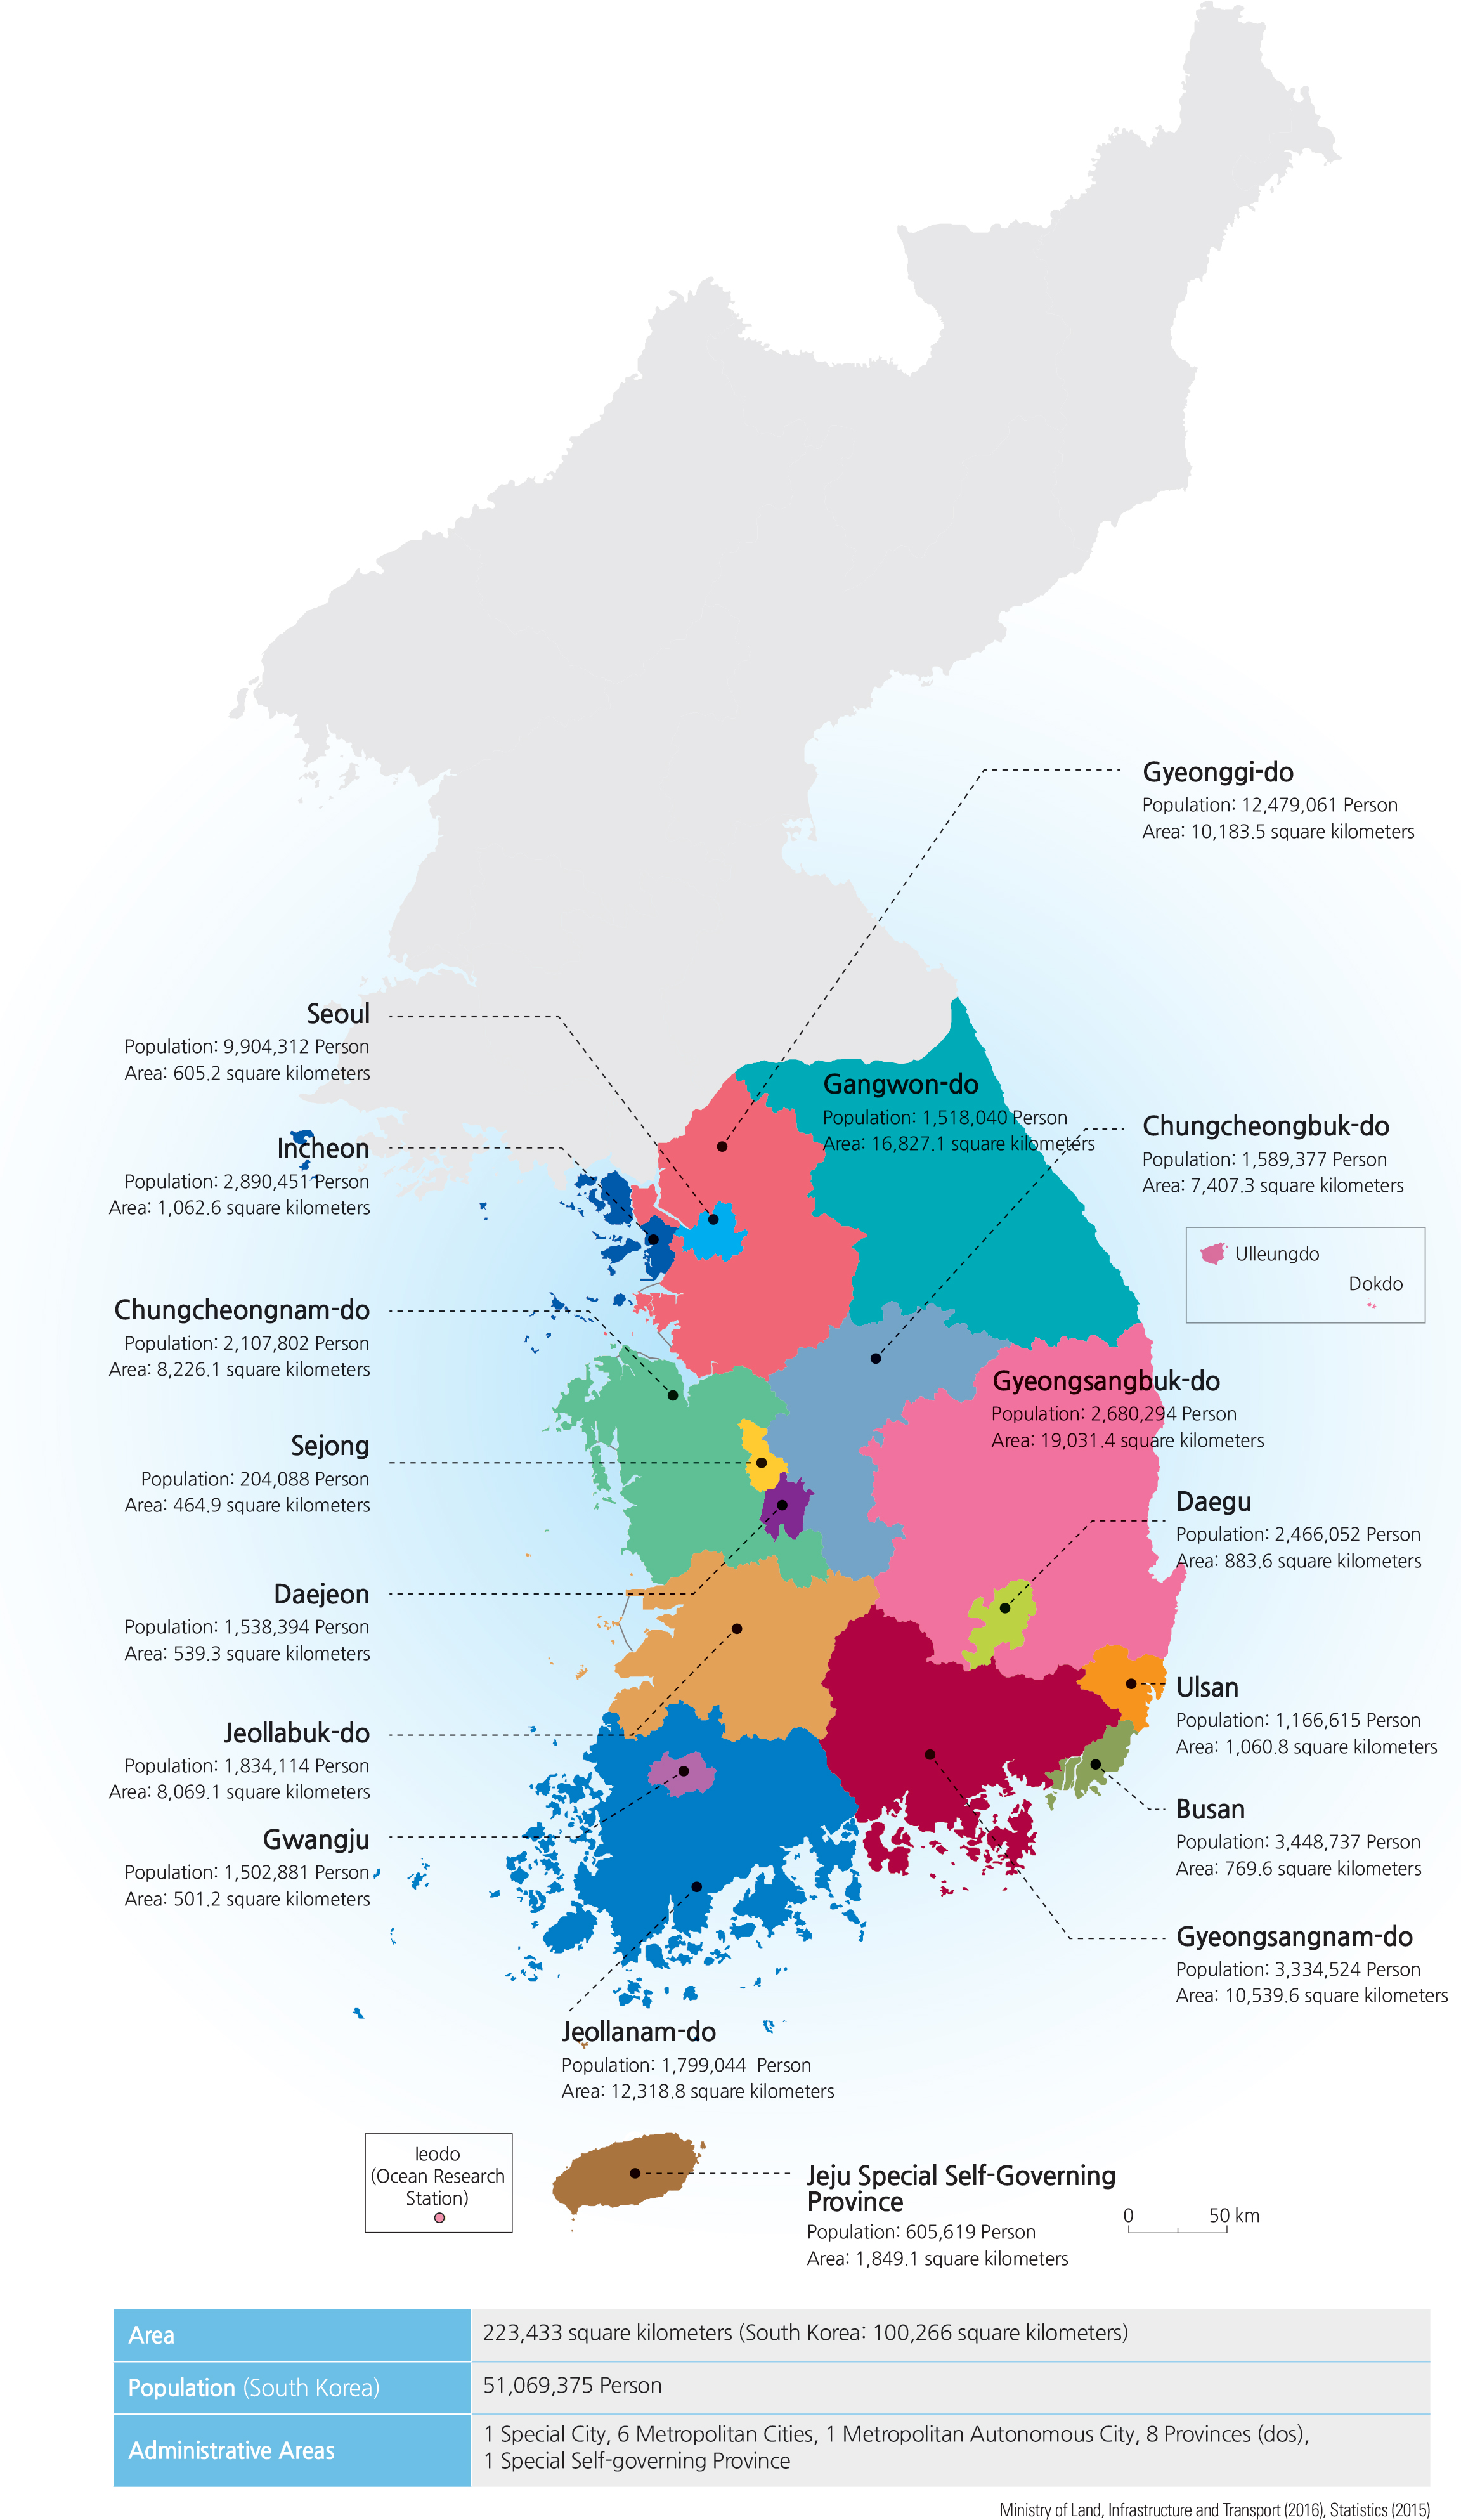

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the ***Case.csv*** dataset and exploring its features

In [2]:
case_data = pd.read_csv('datasets/Case.csv')
case_data

case_id          province             city  group  \
0     1000001             Seoul       Yongsan-gu   True   
1     1000002             Seoul        Gwanak-gu   True   
2     1000003             Seoul          Guro-gu   True   
3     1000004             Seoul     Yangcheon-gu   True   
4     1000005             Seoul        Dobong-gu   True   
..        ...               ...              ...    ...   
169   6100012  Gyeongsangnam-do                -  False   
170   7000001           Jeju-do                -  False   
171   7000002           Jeju-do                -  False   
172   7000003           Jeju-do                -  False   
173   7000004           Jeju-do  from other city   True   

                  infection_case  confirmed   latitude   longitude  
0                  Itaewon Clubs        139  37.538621  126.992652  
1                        Richway        119   37.48208  126.901384  
2            Guro-gu Call Center         95  37.508163  126.884387  
3    Yangcheon Table Tennis Club         43  37.546061  126.874209  
4                Day Care Center         43  37.679422  127.044374  
..                           ...        ...        ...         ...  
169                          etc         20          -           -  
170              overseas inflow         14          -           -  
171         contact with patient          0          -           -  
172                          etc          4          -           -  
173                Itaewon Clubs          1          -           -  

[174 rows x 8 columns]

***We can observe the following features:***

1) case_id - an ID number for the given case  
2) province 
3) city  
4) group - 'True' if the case is a group infection, 'False' if otherwise  
5) infection_case - name of the group  
6) confirmed - accumulated number of confirmed infected patients  
7) latitude  
8) longitude  

#### Let's plot the rough locations of the cases on a blank map of Korea, using the provided coordiantes.

In [3]:
# See if there's any missing coordinates

case_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [4]:
# For some reason, the coordinate columns are consisted of objects instead of float values. Let's explore further

case_data['latitude']

0      37.538621
1       37.48208
2      37.508163
3      37.546061
4      37.679422
         ...    
169            -
170            -
171            -
172            -
173            -
Name: latitude, Length: 174, dtype: object

In [5]:
# Some coordinates are weirdly replaced by a minus sign ('-'). Let's see for how many rows that is the case

print('Missing latitudes: ', len(case_data['latitude'][case_data['latitude'] == '-'].index.tolist()))
print('Missing longitudes: ', len(case_data['longitude'][case_data['longitude'] == '-'].index.tolist()))

Missing latitudes:  109
Missing longitudes:  109


***As we can see, there are 109 cases with missing coordinates. We're not going to remove them from the dataset, but we'll have to remove them from the copy we're going to pass to the MinMaxScaler object***

In [6]:
# Scaling the points with removed invalid values

from sklearn.preprocessing import MinMaxScaler

IMAGE_WIDTH = 381
IMAGE_HEIGHT = 630

coords = case_data[case_data['latitude'] != '-'].iloc[:, -2:]

scaler = MinMaxScaler(feature_range = (0, IMAGE_WIDTH))
latitude = scaler.fit_transform(coords[['latitude']])

scaler2 = MinMaxScaler(feature_range = (0, IMAGE_HEIGHT))
longitude = scaler2.fit_transform(coords[['longitude']])


In [7]:
# Explore the newly scaled features to see if there's any issues
print(latitude[:10])
print(longitude[:10])

[[349.71967266]
 [341.68099791]
 [345.38932909]
 [350.77744915]
 [369.73795045]
 [341.53583799]
 [357.43504316]
 [341.63194779]
 [363.23603726]
 [352.35117602]]
[[151.59947082]
 [131.12890168]
 [127.31663162]
 [125.03380026]
 [163.20023753]
 [129.54967043]
 [165.97964864]
 [137.57434527]
 [134.51928082]
 [162.28647698]]


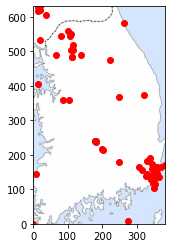

In [8]:
# Loading the Korean map

img = plt.imread('korean-peninsula-blank-map.png')
fig, ax = plt.subplots()
ax.imshow(img, extent = [0, IMAGE_WIDTH, 0, IMAGE_HEIGHT])
plt.scatter(latitude, longitude, c = 'r')
plt.show()

In [9]:
longitude

array([[151.59947082],
       [131.12890168],
       [127.31663162],
       [125.03380026],
       [163.20023753],
       [129.54967043],
       [165.97964864],
       [137.57434527],
       [134.51928082],
       [162.28647698],
       [154.59330389],
       [172.44460552],
       [149.74346477],
       [140.64219429],
       [146.07518938],
       [145.84551564],
       [137.83384968],
       [166.11915749],
       [118.06037622],
       [160.00745856],
       [116.26246149],
       [148.1065908 ],
       [129.28500734],
       [619.12189811],
       [627.03936196],
       [630.        ],
       [616.02668562],
       [504.64389392],
       [482.20382761],
       [502.38954748],
       [482.20427619],
       [517.50898765],
       [143.46960362],
       [241.32876148],
       [238.92088802],
       [235.91978793],
       [240.46436732],
       [212.72318889],
       [218.06758913],
       [189.49900208],
       [102.83910805],
       [170.67854007],
       [180.56617396],
       [138

In [10]:
# Let's see the cities in which there are confirmed cases we have coordinates of

case_data[case_data['latitude'] != '-']['province'].value_counts()

Seoul                23
Gyeonggi-do           8
Gyeongsangbuk-do      7
Gyeongsangnam-do      6
Daegu                 5
Busan                 4
Daejeon               4
Sejong                2
Chungcheongnam-do     2
Gangwon-do            1
Gwangju               1
Chungcheongbuk-do     1
Jeollanam-do          1
Name: province, dtype: int64

#### Let's observe the ratio between group and single cases

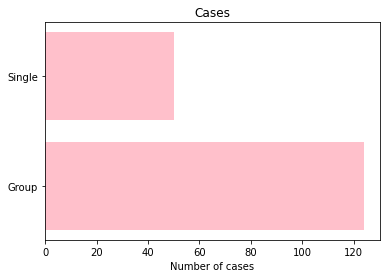

In [11]:
y_axis = ['Group', 'Single']
x_axis = case_data['group'].value_counts().tolist()

plt.barh(y_axis, x_axis, color = 'pink')
plt.title('Cases')
plt.xlabel('Number of cases')
plt.show()

***Group cases account for as much as three times more than the single cases***

### With this, let us move on the next dataset,  PatientInfo.csv


In [12]:
patient_data = pd.read_csv('datasets/PatientInfo.csv')
patient_data

patient_id     sex  age     country province         city  \
0     1000000001    male  50s       Korea    Seoul   Gangseo-gu   
1     1000000002    male  30s       Korea    Seoul  Jungnang-gu   
2     1000000003    male  50s       Korea    Seoul    Jongno-gu   
3     1000000004    male  20s       Korea    Seoul      Mapo-gu   
4     1000000005  female  20s       Korea    Seoul  Seongbuk-gu   
...          ...     ...  ...         ...      ...          ...   
5160  7000000015  female  30s       Korea  Jeju-do      Jeju-do   
5161  7000000016     NaN  NaN       Korea  Jeju-do      Jeju-do   
5162  7000000017     NaN  NaN  Bangladesh  Jeju-do      Jeju-do   
5163  7000000018     NaN  NaN  Bangladesh  Jeju-do      Jeju-do   
5164  7000000019     NaN  NaN  Bangladesh  Jeju-do      Jeju-do   

            infection_case infected_by contact_number symptom_onset_date  \
0          overseas inflow         NaN             75         2020-01-22   
1          overseas inflow         NaN             31                NaN   
2     contact with patient  2002000001             17                NaN   
3          overseas inflow         NaN              9         2020-01-26   
4     contact with patient  1000000002              2                NaN   
...                    ...         ...            ...                ...   
5160       overseas inflow         NaN             25                NaN   
5161       overseas inflow         NaN            NaN                NaN   
5162       overseas inflow         NaN             72                NaN   
5163       overseas inflow         NaN            NaN                NaN   
5164       overseas inflow         NaN            NaN                NaN   

     confirmed_date released_date deceased_date     state  
0        2020-01-23    2020-02-05           NaN  released  
1        2020-01-30    2020-03-02           NaN  released  
2        2020-01-30    2020-02-19           NaN  released  
3        2020-01-30    2020-02-15           NaN  released  
4        2020-01-31    2020-02-24           NaN  released  
...             ...           ...           ...       ...  
5160     2020-05-30    2020-06-13           NaN  released  
5161     2020-06-16    2020-06-24           NaN  released  
5162     2020-06-18           NaN           NaN  isolated  
5163     2020-06-18           NaN           NaN  isolated  
5164     2020-06-18           NaN           NaN  isolated  

[5165 rows x 14 columns]

***We can observe the following features:***  

1) patient_id - an ID  
2) sex   
3) age  - denoted by decades (20s, 30s, 40s etc.)  
4) country  
5) province 
6) city  
7) infection_case  
8) infected_by - ID of patient who infected this patient (if any)  
9) contact_number - number of contacts with patient  
10) symptom_onset_date, confirmed_date, released_date/deceased_date  
11) state - isolated, released or deceased

In [13]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


Text(0.5, 1.0, 'State of patients')

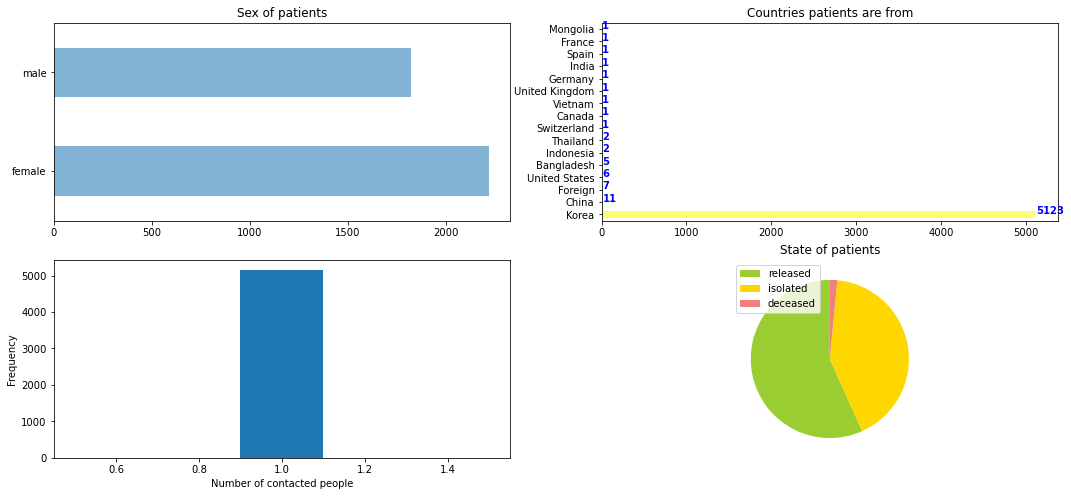

In [14]:
fig = plt.figure(figsize = (18, 8)) 
alpha = alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# Lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2, 2), (0, 0))
patient_data['sex'].value_counts().plot(kind = 'barh', alpha = alpha_bar_chart)
plt.title('Sex of patients')

ax2 = plt.subplot2grid((2, 2), (0, 1))
patient_data['country'].value_counts().plot(kind = 'barh', alpha = alpha_bar_chart, color = 'yellow')
plt.title('Countries patients are from')
for i, v in enumerate(patient_data['country'].value_counts().tolist()):
    ax2.text(v + 3, i + .05, str(v), color = 'blue', fontweight = 'bold')
    
ax3 = plt.subplot2grid((2, 2), (1, 0))
patient_data['contact_number'] = patient_data['contact_number'].astype('|S')
contacts = patient_data['contact_number'].apply(lambda x: int(x) if str(x, 'utf-8').isnumeric() else 0)
contacts.index.value_counts().plot(kind = 'hist', bins = 5)
plt.xlabel('Number of contacted people')    

ax4 = plt.subplot2grid((2, 2), (1, 1))
labels = patient_data['state'].value_counts().index
values = patient_data['state'].value_counts(normalize = True)
colors = ['yellowgreen', 'gold', 'lightcoral']
patches, texts = plt.pie(values, colors = colors, startangle = 90)

plt.legend(patches, labels, loc = 'best')
plt.title('State of patients')

***Based off the plots we created, we can conclude the following:***
1) *Female patients tend to be slightly more*  
2) *An overwhelming majority of patients are Korean, with other nationalities accounting for merely 0.08% of the cases*  
3) *Most people were in contact with just one other person*  
4) *The mortality rate is reasonably low, being at ~1.5%, most patients end up getting released*  

### Now let us take a look at the Region and Weather datasets



In [15]:
region_data = pd.read_csv('datasets/Region.csv')
weather_data = pd.read_csv('datasets/Weather.csv')

In [16]:
region_data

code          province          city   latitude   longitude  \
0    10000             Seoul         Seoul  37.566953  126.977977   
1    10010             Seoul    Gangnam-gu  37.518421  127.047222   
2    10020             Seoul   Gangdong-gu  37.530492  127.123837   
3    10030             Seoul    Gangbuk-gu  37.639938  127.025508   
4    10040             Seoul    Gangseo-gu  37.551166  126.849506   
..     ...               ...           ...        ...         ...   
239  61160  Gyeongsangnam-do     Haman-gun  35.272481  128.406540   
240  61170  Gyeongsangnam-do   Hamyang-gun  35.520541  127.725177   
241  61180  Gyeongsangnam-do  Hapcheon-gun  35.566702  128.165870   
242  70000           Jeju-do       Jeju-do  33.488936  126.500423   
243  80000             Korea         Korea  37.566953  126.977977   

     elementary_school_count  kindergarten_count  university_count  \
0                        607                 830                48   
1                         33                  38                 0   
2                         27                  32                 0   
3                         14                  21                 0   
4                         36                  56                 1   
..                       ...                 ...               ...   
239                       16                  20                 0   
240                       13                  12                 0   
241                       17                  15                 0   
242                      113                 123                 4   
243                     6087                8837               340   

     academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0             1.44                     15.38                  5.8   
1             4.18                     13.17                  4.3   
2             1.54                     14.55                  5.4   
3             0.67                     19.49                  8.5   
4             1.17                     14.39                  5.7   
..             ...                       ...                  ...   
239           1.19                     23.74                 14.7   
240           1.01                     32.65                 20.9   
241           0.71                     38.44                 24.7   
242           1.53                     15.10                  6.4   
243           1.56                     15.67                  7.2   

     nursing_home_count  
0                 22739  
1                  3088  
2                  1023  
3                   628  
4                  1080  
..                  ...  
239                  94  
240                  83  
241                  96  
242                1245  
243               94865  

[244 rows x 12 columns]

In [17]:
weather_data

code          province        date  avg_temp  min_temp  max_temp  \
0      10000             Seoul  2016-01-01       1.2      -3.3       4.0   
1      11000             Busan  2016-01-01       5.3       1.1      10.9   
2      12000             Daegu  2016-01-01       1.7      -4.0       8.0   
3      13000           Gwangju  2016-01-01       3.2      -1.5       8.1   
4      14000           Incheon  2016-01-01       3.1      -0.4       5.7   
...      ...               ...         ...       ...       ...       ...   
26266  50000      Jeollabuk-do  2020-06-29      22.0      19.7      26.5   
26267  51000      Jeollanam-do  2020-06-29      21.9      20.0      24.0   
26268  60000  Gyeongsangbuk-do  2020-06-29      20.4      17.4      24.5   
26269  61000  Gyeongsangnam-do  2020-06-29      21.9      18.8      25.5   
26270  70000           Jeju-do  2020-06-29      23.2      19.1      27.6   

       precipitation  max_wind_speed  most_wind_direction  \
0                0.0             3.5                 90.0   
1                0.0             7.4                340.0   
2                0.0             3.7                270.0   
3                0.0             2.7                230.0   
4                0.0             5.3                180.0   
...              ...             ...                  ...   
26266           27.6             4.4                 90.0   
26267           80.5            16.8                 90.0   
26268           43.9             4.5                160.0   
26269           98.9             5.8                160.0   
26270           25.1            12.8                270.0   

       avg_relative_humidity  
0                       73.0  
1                       52.1  
2                       70.5  
3                       73.1  
4                       83.9  
...                      ...  
26266                   85.1  
26267                   97.9  
26268                   90.9  
26269                   85.0  
26270                   87.4  

[26271 rows x 10 columns]

***The Region dataset contains information about the educational units present in specific Korean cities, along with some insight on the elderly people and the nursing homes. Conversely, the Weather dataset consists of three columns regarding the temperature, two for precipitation and humidity, and two for wind speed and direction. Furthermore, the weather dataset seems to contain data for different days ranging from 1 Jan 2016 and 29 Jun 2020.***

In [18]:
weather_data['date'].value_counts()

2020-04-30    16
2019-09-02    16
2019-10-20    16
2019-12-19    16
2017-01-25    16
              ..
2019-03-03    16
2019-10-22    16
2019-06-08    16
2020-01-15    16
2018-01-02    15
Name: date, Length: 1642, dtype: int64

In [19]:
weather_data.dtypes

code                       int64
province                  object
date                      object
avg_temp                 float64
min_temp                 float64
max_temp                 float64
precipitation            float64
max_wind_speed           float64
most_wind_direction      float64
avg_relative_humidity    float64
dtype: object

In [20]:
weather_data['province'].value_counts()

Daegu                1642
Gyeongsangnam-do     1642
Ulsan                1642
Gwangju              1642
Daejeon              1642
Jeollanam-do         1642
Jeollabuk-do         1642
Gangwon-do           1642
Busan                1642
Incheon              1642
Gyeonggi-do          1642
Jeju-do              1642
Seoul                1642
Gyeongsangbuk-do     1642
Chungcheongnam-do    1641
Chungcheongbuk-do    1613
Chunghceongbuk-do      29
Name: province, dtype: int64

***We can see there is time series data for 1642 days in a row, spanning from 1 Jan 2016 to 29 Jun 2020, with 16 entries per day, one for each province. There seem to be 29 misspelled entries for the "Chungcheongbuk-do" province, which we'll have to take care of.***

In [21]:
weather_data['province'] = weather_data['province'].astype(str)
weather_data.dtypes

code                       int64
province                  object
date                      object
avg_temp                 float64
min_temp                 float64
max_temp                 float64
precipitation            float64
max_wind_speed           float64
most_wind_direction      float64
avg_relative_humidity    float64
dtype: object

In [22]:
weather_data['province'] = weather_data['province'].apply(lambda x: 'Chungcheongbuk-do' if x == 'Chunghceongbuk-do' else x)
weather_data['province'].value_counts()

Gyeongsangnam-do     1642
Gyeongsangbuk-do     1642
Seoul                1642
Jeju-do              1642
Gyeonggi-do          1642
Incheon              1642
Busan                1642
Daegu                1642
Jeollabuk-do         1642
Jeollanam-do         1642
Chungcheongbuk-do    1642
Daejeon              1642
Gwangju              1642
Ulsan                1642
Gangwon-do           1642
Chungcheongnam-do    1641
Name: province, dtype: int64

***We're now going to construct a special dataframe, better suited for the task of plotting the time series. Also, there's missing data for the day 2 Jan 2018, so we're dropping that column.***

In [23]:
weather_data = weather_data[weather_data['date'] != '2018-01-02']
weather_data['date'].value_counts()

2020-04-30    16
2019-09-02    16
2019-10-20    16
2019-12-19    16
2017-01-25    16
              ..
2018-08-14    16
2020-03-10    16
2019-03-03    16
2019-10-22    16
2020-01-15    16
Name: date, Length: 1641, dtype: int64

In [24]:
col_names = weather_data['province'].unique().tolist()
dates = weather_data['date'].unique().tolist()

avg_temp_matrix = []
min_temp_matrix = []
max_temp_matrix = []
precipitation_matrix = []
avg_humidity_matrix = []

for date in dates:
    
    # Average temperatures matrix
    temp = []
    avg_temp_copy = weather_data[weather_data['date'] == date]['avg_temp'].tolist()
    temp = [date] + avg_temp_copy
    avg_temp_matrix.append(temp)
    
    # Minimal temperatures matrix
    temp = []
    min_temp_copy = weather_data[weather_data['date'] == date]['min_temp'].tolist()
    temp = [date] + min_temp_copy
    min_temp_matrix.append(temp)
    
    # Maximal temperatures matrix
    temp = []
    max_temp_copy = weather_data[weather_data['date'] == date]['max_temp'].tolist()
    temp = [date] + max_temp_copy
    max_temp_matrix.append(temp)
    
    # Precipitation matrix
    temp = []
    precipitation_copy = weather_data[weather_data['date'] == date]['precipitation'].tolist()
    temp = [date] + precipitation_copy
    precipitation_matrix.append(temp)
    
    # Humidity matrix
    temp = []
    humidity_copy = weather_data[weather_data['date'] == date]['avg_relative_humidity'].tolist()
    temp = [date] + humidity_copy
    avg_humidity_matrix.append(temp)
    

# Constructing dataframes from the matrices
avg_temp_data = pd.DataFrame(avg_temp_matrix)
min_temp_data = pd.DataFrame(min_temp_matrix)
max_temp_data = pd.DataFrame(max_temp_matrix)
precipitation_data = pd.DataFrame(precipitation_matrix)
avg_humidity_data = pd.DataFrame(avg_humidity_matrix)

# Naming the columns
col_names.insert(0, 'Date')

avg_temp_data.columns = col_names
min_temp_data.columns = col_names
max_temp_data.columns = col_names
precipitation_data.columns = col_names
avg_humidity_data.columns = col_names

In [25]:
avg_temp_data.head()

Date  Seoul  Busan  Daegu  Gwangju  Incheon  Daejeon  Ulsan  \
0  2016-01-01    1.2    5.3    1.7      3.2      3.1      1.6    4.0   
1  2016-01-02    5.7    8.1    3.0      6.5      7.4      6.6    5.6   
2  2016-01-03    6.5   11.4    4.9      7.3      5.9      6.9    7.0   
3  2016-01-04    2.0   10.4    5.8      6.4      2.2      5.1    7.7   
4  2016-01-05   -2.7    5.3    2.9      2.4     -1.9     -0.6    3.9   

   Gyeonggi-do  Gangwon-do  Chungcheongbuk-do  Chungcheongnam-do  \
0          1.6         5.1               -1.0                2.6   
1          5.8         9.1                3.5                6.5   
2          6.0         9.0                3.6                6.2   
3          3.7         7.4                3.9                2.8   
4         -1.1         3.0               -2.0               -1.1   

   Jeollabuk-do  Jeollanam-do  Gyeongsangbuk-do  Gyeongsangnam-do  Jeju-do  
0           2.8           4.5               3.5               2.5      8.2  
1           7.6           7.1               7.5               4.3     12.5  
2           8.4           9.1               9.2               6.7     13.0  
3           5.9           9.9               7.7               7.5     11.7  
4           0.7           5.0               2.5               2.6      8.5

In [26]:
min_temp_data.head()

Date  Seoul  Busan  Daegu  Gwangju  Incheon  Daejeon  Ulsan  \
0  2016-01-01   -3.3    1.1   -4.0     -1.5     -0.4     -4.2   -1.6   
1  2016-01-02    1.0    4.6   -2.7      1.3      4.0      2.0    0.3   
2  2016-01-03    5.1    7.9   -2.3      3.7      4.8      1.0    0.7   
3  2016-01-04   -2.5    7.6    1.1      2.3     -1.8     -0.5    3.0   
4  2016-01-05   -4.8    3.2    0.9     -0.7     -3.6     -3.4    0.7   

   Gyeonggi-do  Gangwon-do  Chungcheongbuk-do  Chungcheongnam-do  \
0         -4.2         2.1               -5.9               -4.4   
1          1.2         5.5                0.4                3.6   
2          2.7         5.3               -1.6                2.7   
3         -1.0         3.3               -2.8               -3.2   
4         -3.4         0.4               -6.1               -5.4   

   Jeollabuk-do  Jeollanam-do  Gyeongsangbuk-do  Gyeongsangnam-do  Jeju-do  
0          -2.0           0.6              -2.1              -2.0      5.2  
1           2.7           3.9               2.7              -0.1      7.8  
2           5.4           6.0               3.6               1.3     10.5  
3           1.6           7.2               2.3               3.1     10.9  
4          -1.9           3.0               0.6               0.9      6.6

In [27]:
max_temp_data.head()

Date  Seoul  Busan  Daegu  Gwangju  Incheon  Daejeon  Ulsan  \
0  2016-01-01    4.0   10.9    8.0      8.1      5.7      7.7   12.0   
1  2016-01-02    9.5   12.2    9.9     12.7     11.1     12.3   14.2   
2  2016-01-03    9.4   16.6   13.9     13.7      7.9     14.1   15.6   
3  2016-01-04    5.3   15.2   11.4     11.4      5.2      9.6   13.9   
4  2016-01-05    1.5    8.1    5.9      5.8      0.2      3.7    7.8   

   Gyeonggi-do  Gangwon-do  Chungcheongbuk-do  Chungcheongnam-do  \
0          5.7         8.9                4.1                7.5   
1         10.3        11.2                9.9               10.6   
2         10.7        13.8               11.4               10.7   
3          7.5        12.0                8.0                6.7   
4          2.6         7.7                2.7                1.4   

   Jeollabuk-do  Jeollanam-do  Gyeongsangbuk-do  Gyeongsangnam-do  Jeju-do  
0           7.7           8.7               8.2               7.9     10.8  
1          12.9          11.3              12.6               9.4     16.8  
2          14.0          13.6              14.9              14.0     16.2  
3           9.6          14.2              11.5              12.3     12.9  
4           4.1           7.2               6.2               6.7     11.1

In [28]:
precipitation_data.head()

Date  Seoul  Busan  Daegu  Gwangju  Incheon  Daejeon  Ulsan  \
0  2016-01-01    0.0    0.0    0.0      0.0      0.0      0.0    0.0   
1  2016-01-02    0.0    0.0    0.0      0.0      0.0      0.0    0.0   
2  2016-01-03    0.0    0.0    0.0      0.0      0.0      0.0    0.0   
3  2016-01-04    0.0    0.0    0.0      0.0      0.0      0.0    0.0   
4  2016-01-05    0.0    0.2    0.0      0.0      0.0      0.0    0.0   

   Gyeonggi-do  Gangwon-do  Chungcheongbuk-do  Chungcheongnam-do  \
0          0.0         0.0                0.0                0.0   
1          0.0         0.0                0.0                0.0   
2          0.0         0.0                0.0                0.0   
3          0.0         0.0                0.0                0.0   
4          0.0         0.0                0.0                0.0   

   Jeollabuk-do  Jeollanam-do  Gyeongsangbuk-do  Gyeongsangnam-do  Jeju-do  
0           0.0           0.0               0.0               0.0      0.0  
1           0.0           0.0               0.0               0.0      0.0  
2           0.0           0.0               0.0               0.0      0.0  
3           0.0           0.0               0.0               0.0      0.0  
4           0.0           3.7               0.0               0.4      6.2

In [29]:
avg_humidity_data.head()

Date  Seoul  Busan  Daegu  Gwangju  Incheon  Daejeon  Ulsan  \
0  2016-01-01   73.0   52.1   70.5     73.1     83.9     77.4   53.3   
1  2016-01-02   76.9   62.9   74.8     78.6     93.1     76.5   61.0   
2  2016-01-03   80.6   68.3   77.0     78.9     98.0     83.5   76.4   
3  2016-01-04   54.4   46.3   58.1     66.5     72.9     62.5   52.8   
4  2016-01-05   39.4   40.9   29.4     40.3     46.3     45.4   31.9   

   Gyeonggi-do  Gangwon-do  Chungcheongbuk-do  Chungcheongnam-do  \
0         80.1        33.0               79.4               86.3   
1         83.1        43.8               74.9               91.4   
2         92.1        55.8               81.0               93.4   
3         54.4        33.8               54.3               73.6   
4         39.6        16.3               46.5               59.3   

   Jeollabuk-do  Jeollanam-do  Gyeongsangbuk-do  Gyeongsangnam-do  Jeju-do  
0          74.4          54.5              47.6              59.1     60.1  
1          73.3          63.8              50.5              67.6     62.6  
2          81.1          72.4              53.3              77.5     67.0  
3          70.1          40.1              41.0              55.1     66.3  
4          53.0          49.0              24.9              41.1     66.9

***Everything seems in place and ready to be operated with. The only thing that remains is to turn the dates column into an index column. Converting the type to datetime64 would be required, too.***

In [30]:
avg_temp_data['Date'] = pd.to_datetime(avg_temp_data['Date'])
min_temp_data['Date'] = pd.to_datetime(min_temp_data['Date'])
max_temp_data['Date'] = pd.to_datetime(max_temp_data['Date'])
precipitation_data['Date'] = pd.to_datetime(precipitation_data['Date'])
avg_humidity_data['Date'] = pd.to_datetime(avg_humidity_data['Date'])

avg_temp_data = avg_temp_data.set_index('Date')
min_temp_data = min_temp_data.set_index('Date')
max_temp_data = max_temp_data.set_index('Date')
precipitation_data = precipitation_data.set_index('Date')
avg_humidity_data = avg_humidity_data.set_index('Date')

avg_temp_data.head()

Seoul  Busan  Daegu  Gwangju  Incheon  Daejeon  Ulsan  \
Date                                                                
2016-01-01    1.2    5.3    1.7      3.2      3.1      1.6    4.0   
2016-01-02    5.7    8.1    3.0      6.5      7.4      6.6    5.6   
2016-01-03    6.5   11.4    4.9      7.3      5.9      6.9    7.0   
2016-01-04    2.0   10.4    5.8      6.4      2.2      5.1    7.7   
2016-01-05   -2.7    5.3    2.9      2.4     -1.9     -0.6    3.9   

            Gyeonggi-do  Gangwon-do  Chungcheongbuk-do  Chungcheongnam-do  \
Date                                                                        
2016-01-01          1.6         5.1               -1.0                2.6   
2016-01-02          5.8         9.1                3.5                6.5   
2016-01-03          6.0         9.0                3.6                6.2   
2016-01-04          3.7         7.4                3.9                2.8   
2016-01-05         -1.1         3.0               -2.0               -1.1   

            Jeollabuk-do  Jeollanam-do  Gyeongsangbuk-do  Gyeongsangnam-do  \
Date                                                                         
2016-01-01           2.8           4.5               3.5               2.5   
2016-01-02           7.6           7.1               7.5               4.3   
2016-01-03           8.4           9.1               9.2               6.7   
2016-01-04           5.9           9.9               7.7               7.5   
2016-01-05           0.7           5.0               2.5               2.6   

            Jeju-do  
Date                 
2016-01-01      8.2  
2016-01-02     12.5  
2016-01-03     13.0  
2016-01-04     11.7  
2016-01-05      8.5

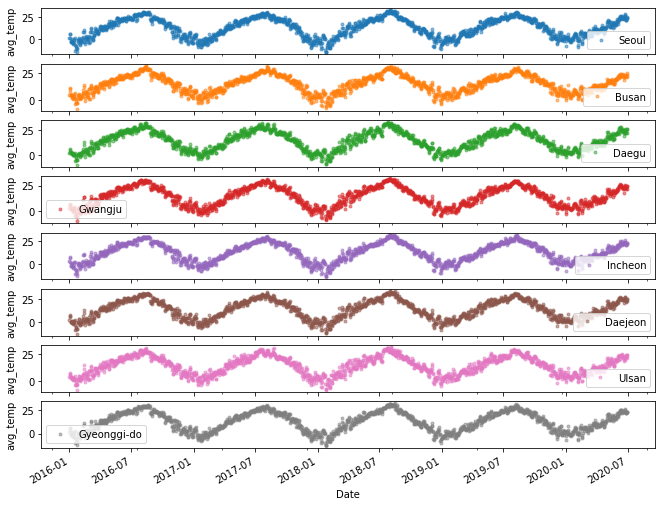

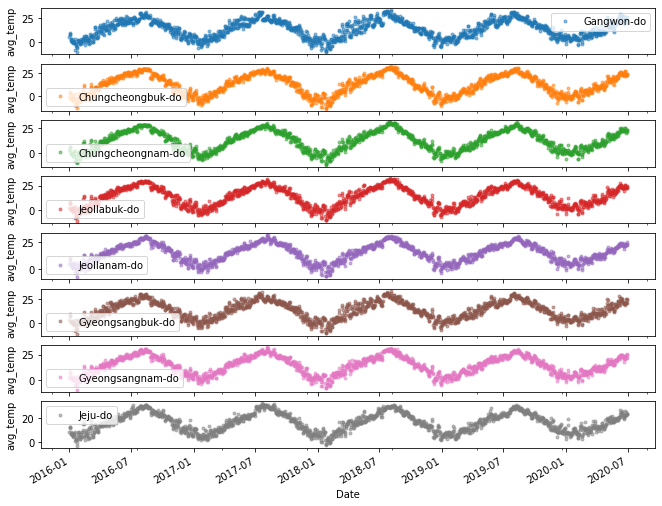

In [31]:
# Plotting the time series data

# First half of cities - average temperature
cols_plot = col_names[1:9]
axes = avg_temp_data[cols_plot].plot(marker = '.', alpha = 0.5,
                                     linestyle = 'None', figsize = (11, 9),
                                     subplots = True)
for ax in axes:
    ax.set_ylabel('avg_temp')
    
# Second half of cities - average temperature
cols_plot = col_names[9:]
axes = avg_temp_data[cols_plot].plot(marker = '.', alpha = 0.5,
                                     linestyle = 'None', figsize = (11, 9),
                                     subplots = True)
for ax in axes:
    ax.set_ylabel('avg_temp')

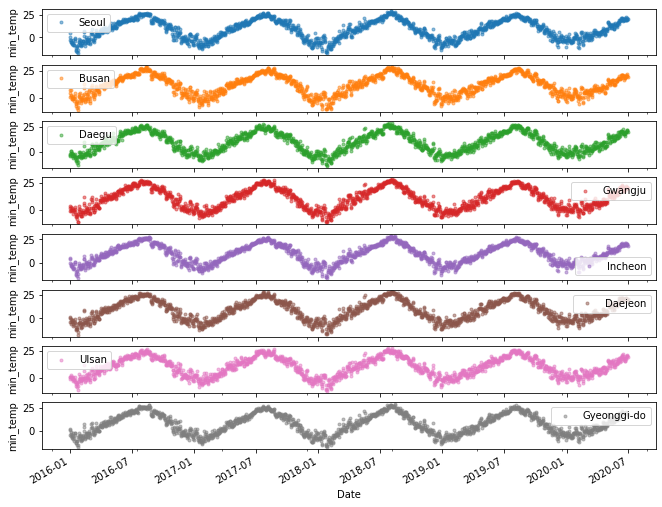

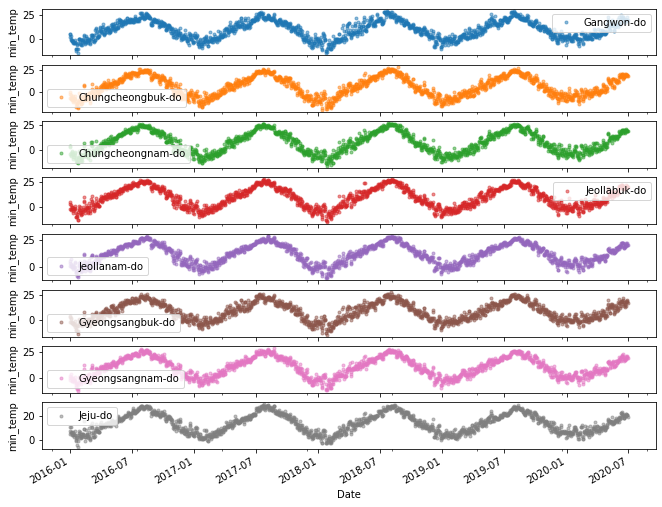

In [32]:
# Plotting the time series data

# First half of cities - minimal temperature
cols_plot = col_names[1:9]
axes = min_temp_data[cols_plot].plot(marker = '.', alpha = 0.5,
                                     linestyle = 'None', figsize = (11, 9),
                                     subplots = True)
for ax in axes:
    ax.set_ylabel('min_temp')
    
# Second half of cities - minimal temperature
cols_plot = col_names[9:]
axes = min_temp_data[cols_plot].plot(marker = '.', alpha = 0.5,
                                     linestyle = 'None', figsize = (11, 9),
                                     subplots = True)
for ax in axes:
    ax.set_ylabel('min_temp')

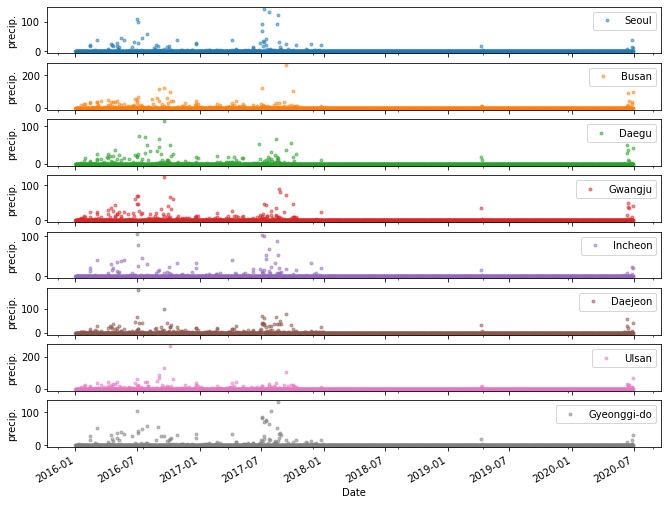

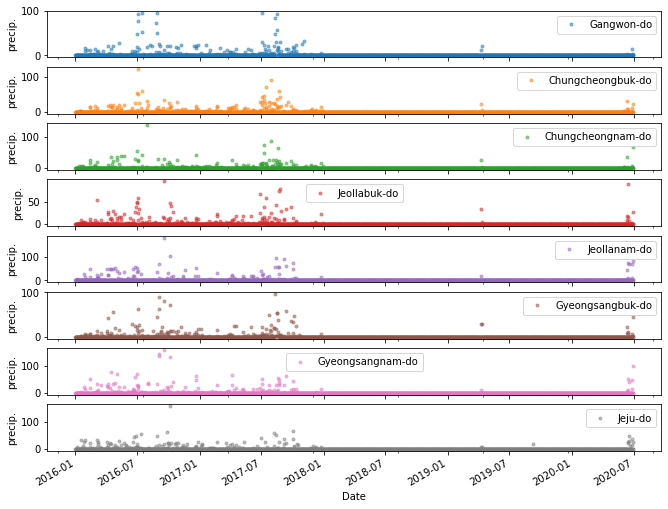

In [33]:
# Plotting the time series data

# First half of cities - precipitation
cols_plot = col_names[1:9]
axes = precipitation_data[cols_plot].plot(marker = '.', alpha = 0.5,
                                     linestyle = 'None', figsize = (11, 9),
                                     subplots = True)
for ax in axes:
    ax.set_ylabel('precip.')
    
# Second half of cities - precipitation
cols_plot = col_names[9:]
axes = precipitation_data[cols_plot].plot(marker = '.', alpha = 0.5,
                                     linestyle = 'None', figsize = (11, 9),
                                     subplots = True)
for ax in axes:
    ax.set_ylabel('precip.')

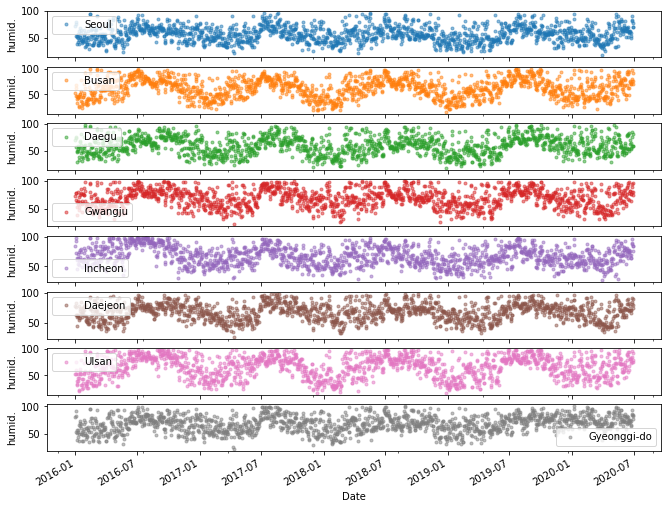

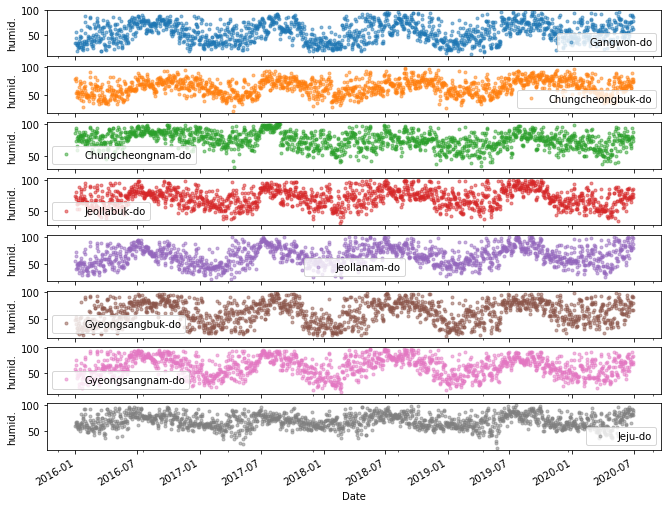

In [34]:
# Plotting the time series data

# First half of cities - average humidity
cols_plot = col_names[1:9]
axes = avg_humidity_data[cols_plot].plot(marker = '.', alpha = 0.5,
                                     linestyle = 'None', figsize = (11, 9),
                                     subplots = True)
for ax in axes:
    ax.set_ylabel('humid.')
    
# Second half of cities - average humidity
cols_plot = col_names[9:]
axes = avg_humidity_data[cols_plot].plot(marker = '.', alpha = 0.5,
                                     linestyle = 'None', figsize = (11, 9),
                                     subplots = True)
for ax in axes:
    ax.set_ylabel('humid.')